# Quantitative easing following the Financial Crisis

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

# Introduction

The aim of this project is to examine the use of Quantitative Easing (QE) by the Federal Reserve Bank of America (FED) in response to the Financial Crisis in 2008 and focus on the first round of QE in the US called QE1. We estimate effect the use of QE1 had on yields of bonds and decompose the effect down into several channels that QE can effect through. We took on this project because we find QE interresting since it was a central response trying to stabilize the financial markets and lowering the interest rates to stimulate growth following the Financial Crisis.

We do so by employing an event study methodology inspired by Krishnamurthy and Vissing-Jorgensen's (2011) approach. Our analysis reveals that the implementation of QE1 had a statistically significant impact on bond yields.

# Data 

###########   Beskrivelse af det data vi benytter   ##############

Imports and set magics:

# Explaining the imports and merging of data:

In the following code we start by importing required libraries such as pandas, numpy, matplotlib, and ipywidgets. Furthermore we import a module named "dataproject" and load the autoreload extension package. This package allows the code to automatically reload any modified modules when the code is run.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib widget

# user written modules
import dataproject

# Read and merge data

We import the data. We do this with CVS files. The code reads our two data CVS files named 'Treasuries.csv' and 'Agency.csv' using pandas' read_csv() function. We than stores them in two separate data frames named 'df_tres' and 'df_agency'. We use the merge()' function to merge the two data frames int a single data fram named 'df_merged' based on the 'Date' column.

Finally we showcase the data by printing the first 10 rows of the merged data frame 'df_merged.

In [3]:
# Make csv files to datafranes and merge datasets
df_tres = pd.read_csv('Treasuries.csv', sep=";")
#print(df_tres.head(10))
df_agency = pd.read_csv('Agency.csv', sep=";")
print(df_tres.columns)
print(df_agency.columns)
df_merged = df_tres.merge(df_agency, on="Date", how='inner')
df_merged.sort_values(by=['Number'], ascending=False)
df_merged["Date"] = pd.to_datetime(df_merged["Date"], format="%d.%m.%Y")
print (df_merged.head(10))

# Change variable names

Index(['Date', '1 year', '3 year', '5 year', '10 year', '30 year', 'Number',
       'Citi surprise'],
      dtype='object')
Index(['Date', 'Freddie Mac 10', 'Fannie Mae 10', 'Fannie Mae 30',
       'Freddie Mac 30', 'Freddie Mac 5', 'Fannie Mae 5', 'Freddie Mac 3',
       'Fannie Mae 3'],
      dtype='object')
        Date  1 year  3 year  5 year  10 year  30 year  Number  Citi surprise  \
0 2011-12-30      12      36      83      189      289    1001           6850   
1 2011-12-29      12      41      88      191      290    1000           6940   
2 2011-12-28      12      42      91      193      291     999           6950   
3 2011-12-27      12      45      96      202      304     998           7120   
4 2011-12-23      12      45      97      203      305     997           7120   
5 2011-12-22      12      41      91      197      299     996           6940   
6 2011-12-21      13      40      91      198      300     995           7050   
7 2011-12-20      12      39      88    

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

The following code is creating an interactive plot using the Matplotlib and ipywidgets libraries. It starts by enabling the "widget" backend for Matplotlib by running the command '%matplotlib widget'.
The interactive plot depicts the US Treasuries alongside the agency bonds issued by Fannie Mae, during the time span of January 2008 to January 2012.

SelectMultiple(description='Select variables:', index=(0,), options=('1 year', '3 year', '5 year', '10 year', …

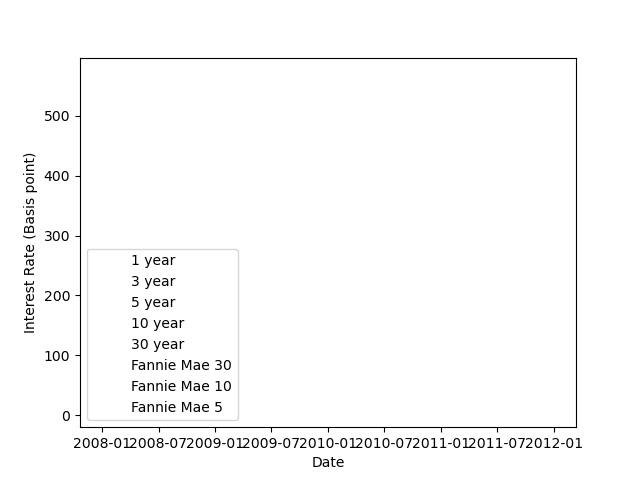

In [4]:
# Load data
variable_names = ['1 year', '3 year', '5 year', '10 year', '30 year', 'Fannie Mae 30', 'Fannie Mae 10', 'Fannie Mae 5']

# Define initial plot
fig, ax = plt.subplots()
lines = []
for variable_name in variable_names:
    line, = ax.plot(df_merged['Date'], df_merged[variable_name], label=variable_name, visible=False)
    lines.append(line)
ax.legend()
    
# Define callback function to update plot
def update_plot(change):
    selected_variables = change.new
    for i, line in enumerate(lines):
        if variable_names[i] in selected_variables:
            line.set_visible(True)
        else:
            line.set_visible(False)
    ax.legend()
    fig.canvas.draw_idle()

# Set x and y labels
ax.set_xlabel('Date')
ax.set_ylabel('Interest Rate (Basis point)')

# Define widget
select_multiple = widgets.SelectMultiple(options=variable_names, value=[variable_names[0]], description='Select variables:')
select_multiple.observe(update_plot, names='value')

# Display plot and widget
display(select_multiple)

SKRIV OMKRING GRAFEN OG HVAD DER SES OG ÆNDRE 


We now make a new variable that is the spread between Agency bond and treasuries with same duration. 

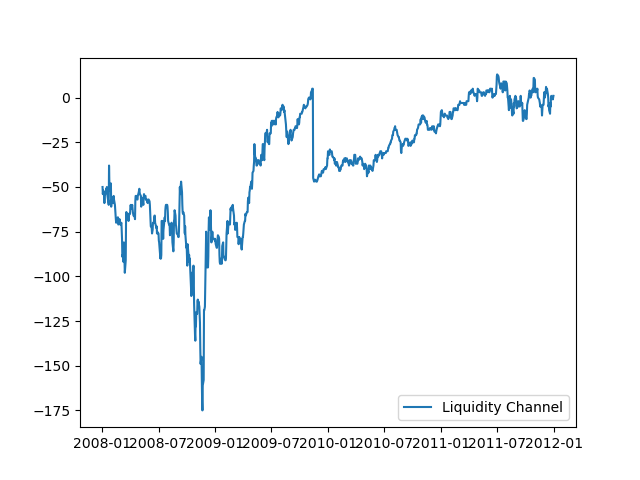

In [11]:
fig1, ax1 = plt.subplots()
ax1.plot(df_merged['Date'], df_merged['liquidity channel'], label='Liquidity premium')
df_merged['liquidity channel'] = df_merged['10 year'] - df_merged['Fannie Mae 10']
ax1.legend(loc='lower right')

# Analysis

In our event study, we focus on 5 announcement dates :

- On November 25, 2008, the FED announces the creation of a program to purchase $500 billion of MBS and $100 billion of agency debt.

- On December 1, 2008, the FED Chairman Ben Bernanke gives a speech where he addresses and elaborates on the FED's plans to use unconventional monetary policy and announces that the FED plans to purchase large quantities of long-term US government bonds.

- On December 16, 2008, the FED issues a statement that its policy will focus on supporting financial markets through MBS purchases. The FED will also investigate the benefits of purchasing long-term US government bonds and generally explore options for supporting credit markets and economic activity through the FED's balance sheet. The FED establishes an upper and lower bound for the Federal Funds Rate target range, which is set between 0% and 0.25%.

- On January 28, 2009, the FED reiterates its commitment to expand the program of purchasing agency debt and MBS. The FED also maintains the target range for the Federal Funds Rate between 0% and 0.25%, which was established on December 16, 2008.

- On March 18, 2009, the FED announces the specific amounts it will purchase of various assets, including $300 billion of long-term US government bonds. The FED also sets an upper limit on its purchases.


We assume the efficient market hypothesis so the investors believes about the announcement will be shown in the yield when the announcement is made. We have chosen a 2 day interval for the event days so we assume that the effect from QE will be fully intergrated in the pricens and yield within the interval.

# Conclusion

ADD CONCISE CONLUSION.